# BT4211 Project


## Feature's Description
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not - frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRC_FULL_PAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [78]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['CUST_ID'].nunique()

8950

In [11]:
#To treat the missing values for Minimum Payment: we will patch it with the Median value
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())

#Since it is illogical to have no credit limit for a credit card, we decided to drop the single entry.
df = df.dropna(subset = ['CREDIT_LIMIT'])

#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

#Based on the type of purchases, we can classify or categorise it according to type of purchase they made.
df['Type_of_Purchase'] = np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] == 0), 'Cash',
                        np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] > 0), 'One_off',
                        np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] == 0), 'Installment', 'Both')))

#Monthly Average Purchase over the period the customer has been using the card
df['Avg_Monthly_Purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['Avg_Monthly_Cash'] = df['CASH_ADVANCE']/df['TENURE']

#Utilization rate of Credit Card
df['Card_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']

## Exploratory Data Analysis (EDA)

In [12]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Type_of_Purchase', 'Avg_Monthly_Purchase',
       'Avg_Monthly_Cash', 'Card_Usage'],
      dtype='object')

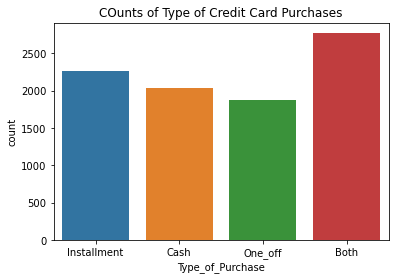

In [13]:
sns.countplot(data = df, x = 'Type_of_Purchase')
plt.title('COunts of Type of Credit Card Purchases')
plt.show()

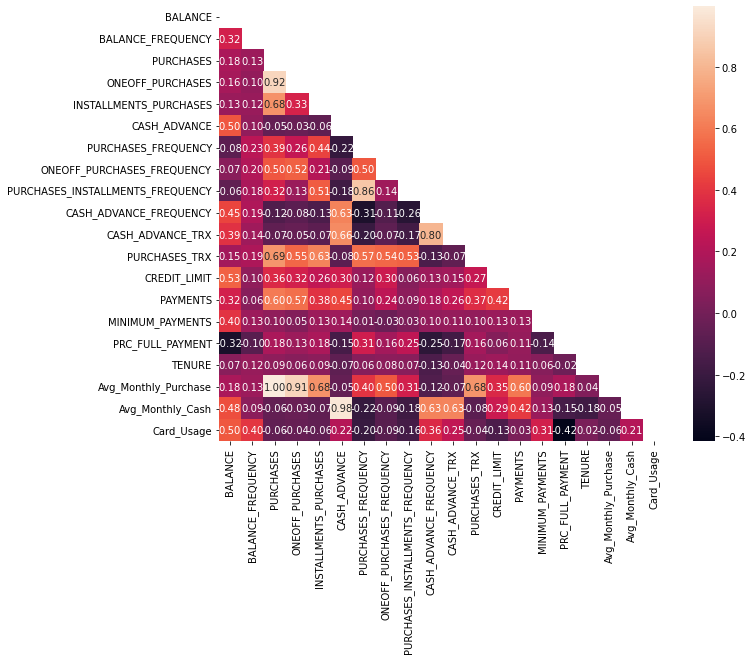

In [14]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt=".2f", mask = np.triu(corr))
plt.show()

In [15]:
# Creating a bar plot showing the correlation of the numeric features
c = corr.abs()
corr_bar = c.unstack().sort_values(kind='quicksort')
corr_bar = corr_bar.loc[lambda x: x < 1]
corr_bar = corr_bar.drop_duplicates()
corr_bar = corr_bar.sort_values(ascending = False)

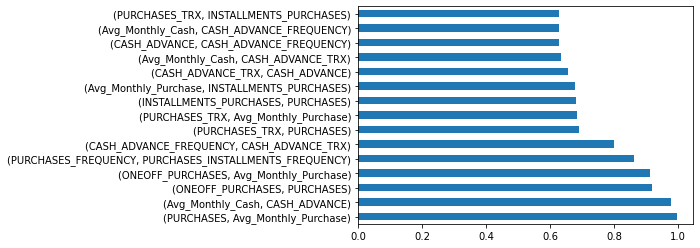

In [16]:
#top 15 correlated features.
corr_bar[:15].plot(kind = 'barh')
plt.show()

In [17]:
# Quantile Statistics
quantile = df.describe().loc[["min", "25%", "50%", "75%", "max"]].transpose()
quantile.columns = ["min", "Q1", "Q2", "Q3", "max"]
quantile["range"] = quantile["max"] - quantile["min"]
quantile["IQR"] = quantile["Q3"] - quantile["Q1"]
quantile

min           Q1           Q2  \
BALANCE                            0.000000   128.365782   873.680279   
BALANCE_FREQUENCY                  0.000000     0.888889     1.000000   
PURCHASES                          0.000000    39.800000   361.490000   
ONEOFF_PURCHASES                   0.000000     0.000000    38.000000   
INSTALLMENTS_PURCHASES             0.000000     0.000000    89.000000   
CASH_ADVANCE                       0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY         0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY   0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY             0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                   0.000000     0.000000     0.000000   
PURCHASES_TRX                      0.000000     1.000000     7.000000   
CREDIT_LIMIT                      50.000000  1600.000000  3000.000000   
PAYMENTS                           0.000000   383.282850   857.062706   
MINIMUM_PAYMENTS                   0.019163   170.875613   312.343947   
PRC_FULL_PAYMENT                   0.000000     0.000000     0.000000   
TENURE                             6.000000    12.000000    12.000000   
Avg_Monthly_Purchase               0.000000     3.422500    31.940000   
Avg_Monthly_Cash                   0.000000     0.000000     0.000000   
Card_Usage                         0.000000     0.041527     0.302870   

                                           Q3           max         range  \
BALANCE                           2054.372848  19043.138560  19043.138560   
BALANCE_FREQUENCY                    1.000000      1.000000      1.000000   
PURCHASES                         1110.170000  49039.570000  49039.570000   
ONEOFF_PURCHASES                   577.830000  40761.250000  40761.250000   
INSTALLMENTS_PURCHASES             468.650000  22500.000000  22500.000000   
CASH_ADVANCE                      1113.868654  47137.211760  47137.211760   
PURCHASES_FREQUENCY                  0.916667      1.000000      1.000000   
ONEOFF_PURCHASES_FREQUENCY           0.300000      1.000000      1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000      1.000000   
CASH_ADVANCE_FREQUENCY               0.222222      1.500000      1.500000   
CASH_ADVANCE_TRX                     4.000000    123.000000    123.000000   
PURCHASES_TRX                       17.000000    358.000000    358.000000   
CREDIT_LIMIT                      6500.000000  30000.000000  29950.000000   
PAYMENTS                          1901.279320  50721.483360  50721.483360   
MINIMUM_PAYMENTS                   788.721609  76406.207520  76406.188357   
PRC_FULL_PAYMENT                     0.142857      1.000000      1.000000   
TENURE                              12.000000     12.000000      6.000000   
Avg_Monthly_Purchase                97.230000   4086.630833   4086.630833   
Avg_Monthly_Cash                    99.107730   3928.100980   3928.100980   
Card_Usage                           0.717582     15.909951     15.909951   

                                          IQR  
BALANCE                           1926.007066  
BALANCE_FREQUENCY                    0.111111  
PURCHASES                         1070.370000  
ONEOFF_PURCHASES                   577.830000  
INSTALLMENTS_PURCHASES             468.650000  
CASH_ADVANCE                      1113.868654  
PURCHASES_FREQUENCY                  0.833334  
ONEOFF_PURCHASES_FREQUENCY           0.300000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000  
CASH_ADVANCE_FREQUENCY               0.222222  
CASH_ADVANCE_TRX                     4.000000  
PURCHASES_TRX                       16.000000  
CREDIT_LIMIT                      4900.000000  
PAYMENTS                          1517.996470  
MINIMUM_PAYMENTS                   617.845996  
PRC_FULL_PAYMENT                     0.142857  
TENURE                               0.000000  
Avg_Monthly_Purchase    

In [18]:
#General Descriptive Statistics for Numerical Features
numerical_features = df.drop(['Type_of_Purchase'], axis = 1).columns
descriptive_stats = df[numerical_features].describe().loc[["mean", "std", "50%"]].transpose()
descriptive_stats.columns = ["mean", "std", "median"]
descriptive_stats["mode"] = df.mode().transpose()[0]
descriptive_stats["mad"] = [stats.median_abs_deviation(df[x]) for x in numerical_features]
descriptive_stats["kurtosis"] = [stats.kurtosis(df[x], fisher=False) for x in numerical_features]
descriptive_stats["excess kurtosis"] = [stats.kurtosis(df[x], fisher=True) for x in numerical_features]
descriptive_stats["skewness"] = [stats.skew(df[x]) for x in numerical_features]
descriptive_stats

mean          std       median  \
BALANCE                           1564.647593  2081.584016   873.680279   
BALANCE_FREQUENCY                    0.877350     0.236798     1.000000   
PURCHASES                         1003.316936  2136.727848   361.490000   
ONEOFF_PURCHASES                   592.503572  1659.968851    38.000000   
INSTALLMENTS_PURCHASES             411.113579   904.378205    89.000000   
CASH_ADVANCE                       978.959616  2097.264344     0.000000   
PURCHASES_FREQUENCY                  0.490405     0.401360     0.500000   
ONEOFF_PURCHASES_FREQUENCY           0.202480     0.298345     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364478     0.397451     0.166667   
CASH_ADVANCE_FREQUENCY               0.135141     0.200132     0.000000   
CASH_ADVANCE_TRX                     3.249078     6.824987     0.000000   
PURCHASES_TRX                       14.711476    24.858552     7.000000   
CREDIT_LIMIT                      4494.449450  3638.815725  3000.000000   
PAYMENTS                          1733.336511  2895.168146   857.062706   
MINIMUM_PAYMENTS                   844.999569  2332.906149   312.343947   
PRC_FULL_PAYMENT                     0.153732     0.292511     0.000000   
TENURE                              11.517935     1.337134    12.000000   
Avg_Monthly_Purchase                86.184802   180.516574    31.940000   
Avg_Monthly_Cash                    88.984447   193.145939     0.000000   
Card_Usage                           0.388926     0.389722     0.302870   

                                        mode          mad    kurtosis  \
BALANCE                                  0.0   800.045248   10.669089   
BALANCE_FREQUENCY                        1.0     0.000000    6.095206   
PURCHASES                                0.0   361.490000  114.317027   
ONEOFF_PURCHASES                         0.0    38.000000  167.079674   
INSTALLMENTS_PURCHASES                   0.0    89.000000   99.512552   
CASH_ADVANCE                             0.0     0.000000   55.863880   
PURCHASES_FREQUENCY                      1.0     0.416667    1.361634   
ONEOFF_PURCHASES_FREQUENCY               0.0     0.083333    4.160000   
PURCHASES_INSTALLMENTS_FREQUENCY         0.0     0.166667    1.601313   
CASH_ADVANCE_FREQUENCY                   0.0     0.000000    6.331658   
CASH_ADVANCE_TRX                           0     0.000000   64.605263   
PURCHASES_TRX                              0     7.000000   37.770493   
CREDIT_LIMIT                          3000.0  1800.000000    5.834401   
PAYMENTS                                 0.0   581.375627   57.736011   
MINIMUM_PAYMENTS                  312.343947   182.661339  296.528612   
PRC_FULL_PAYMENT                         0.0     0.000000    5.429630   
TENURE                                    12     0.000000   10.702409   
Avg_Monthly_Purchase                     0.0    31.940000  110.731438   
Avg_Monthly_Cash                         0.0     0.000000   47.151336   
Card_Usage                               0.0     0.283333  282.479014   

                                  excess kurtosis   skewness  
BALANCE                                  7.669089   2.392869  
BALANCE_FREQUENCY                        3.095206  -2.023854  
PURCHASES                              111.317027   8.142604  
ONEOFF_PURCHASES                       164.079674  10.042938  
INSTALLMENTS_PURCHASES                  96.512552   7.297600  
CASH_ADVANCE                            52.863880   5.165457  
PURCHASES_FREQUENCY                     -1.638366   0.059960  
ONEOFF_PURCHASES_FREQUENCY               1.160000   1.535196  
PURCHASES_INSTALLMENTS_FREQUENCY        -1.398687   0.508938  
CASH_ADVANCE_FREQUENCY                   3.331658   1.828338  
CASH_ADVANCE_TRX                        61.605263   5.720017  
PURCHASES_TRX                           34.770493   4.629717  
CREDIT_LIMIT                             2.834401   1.522209  
PAYMENTS                                54.736011

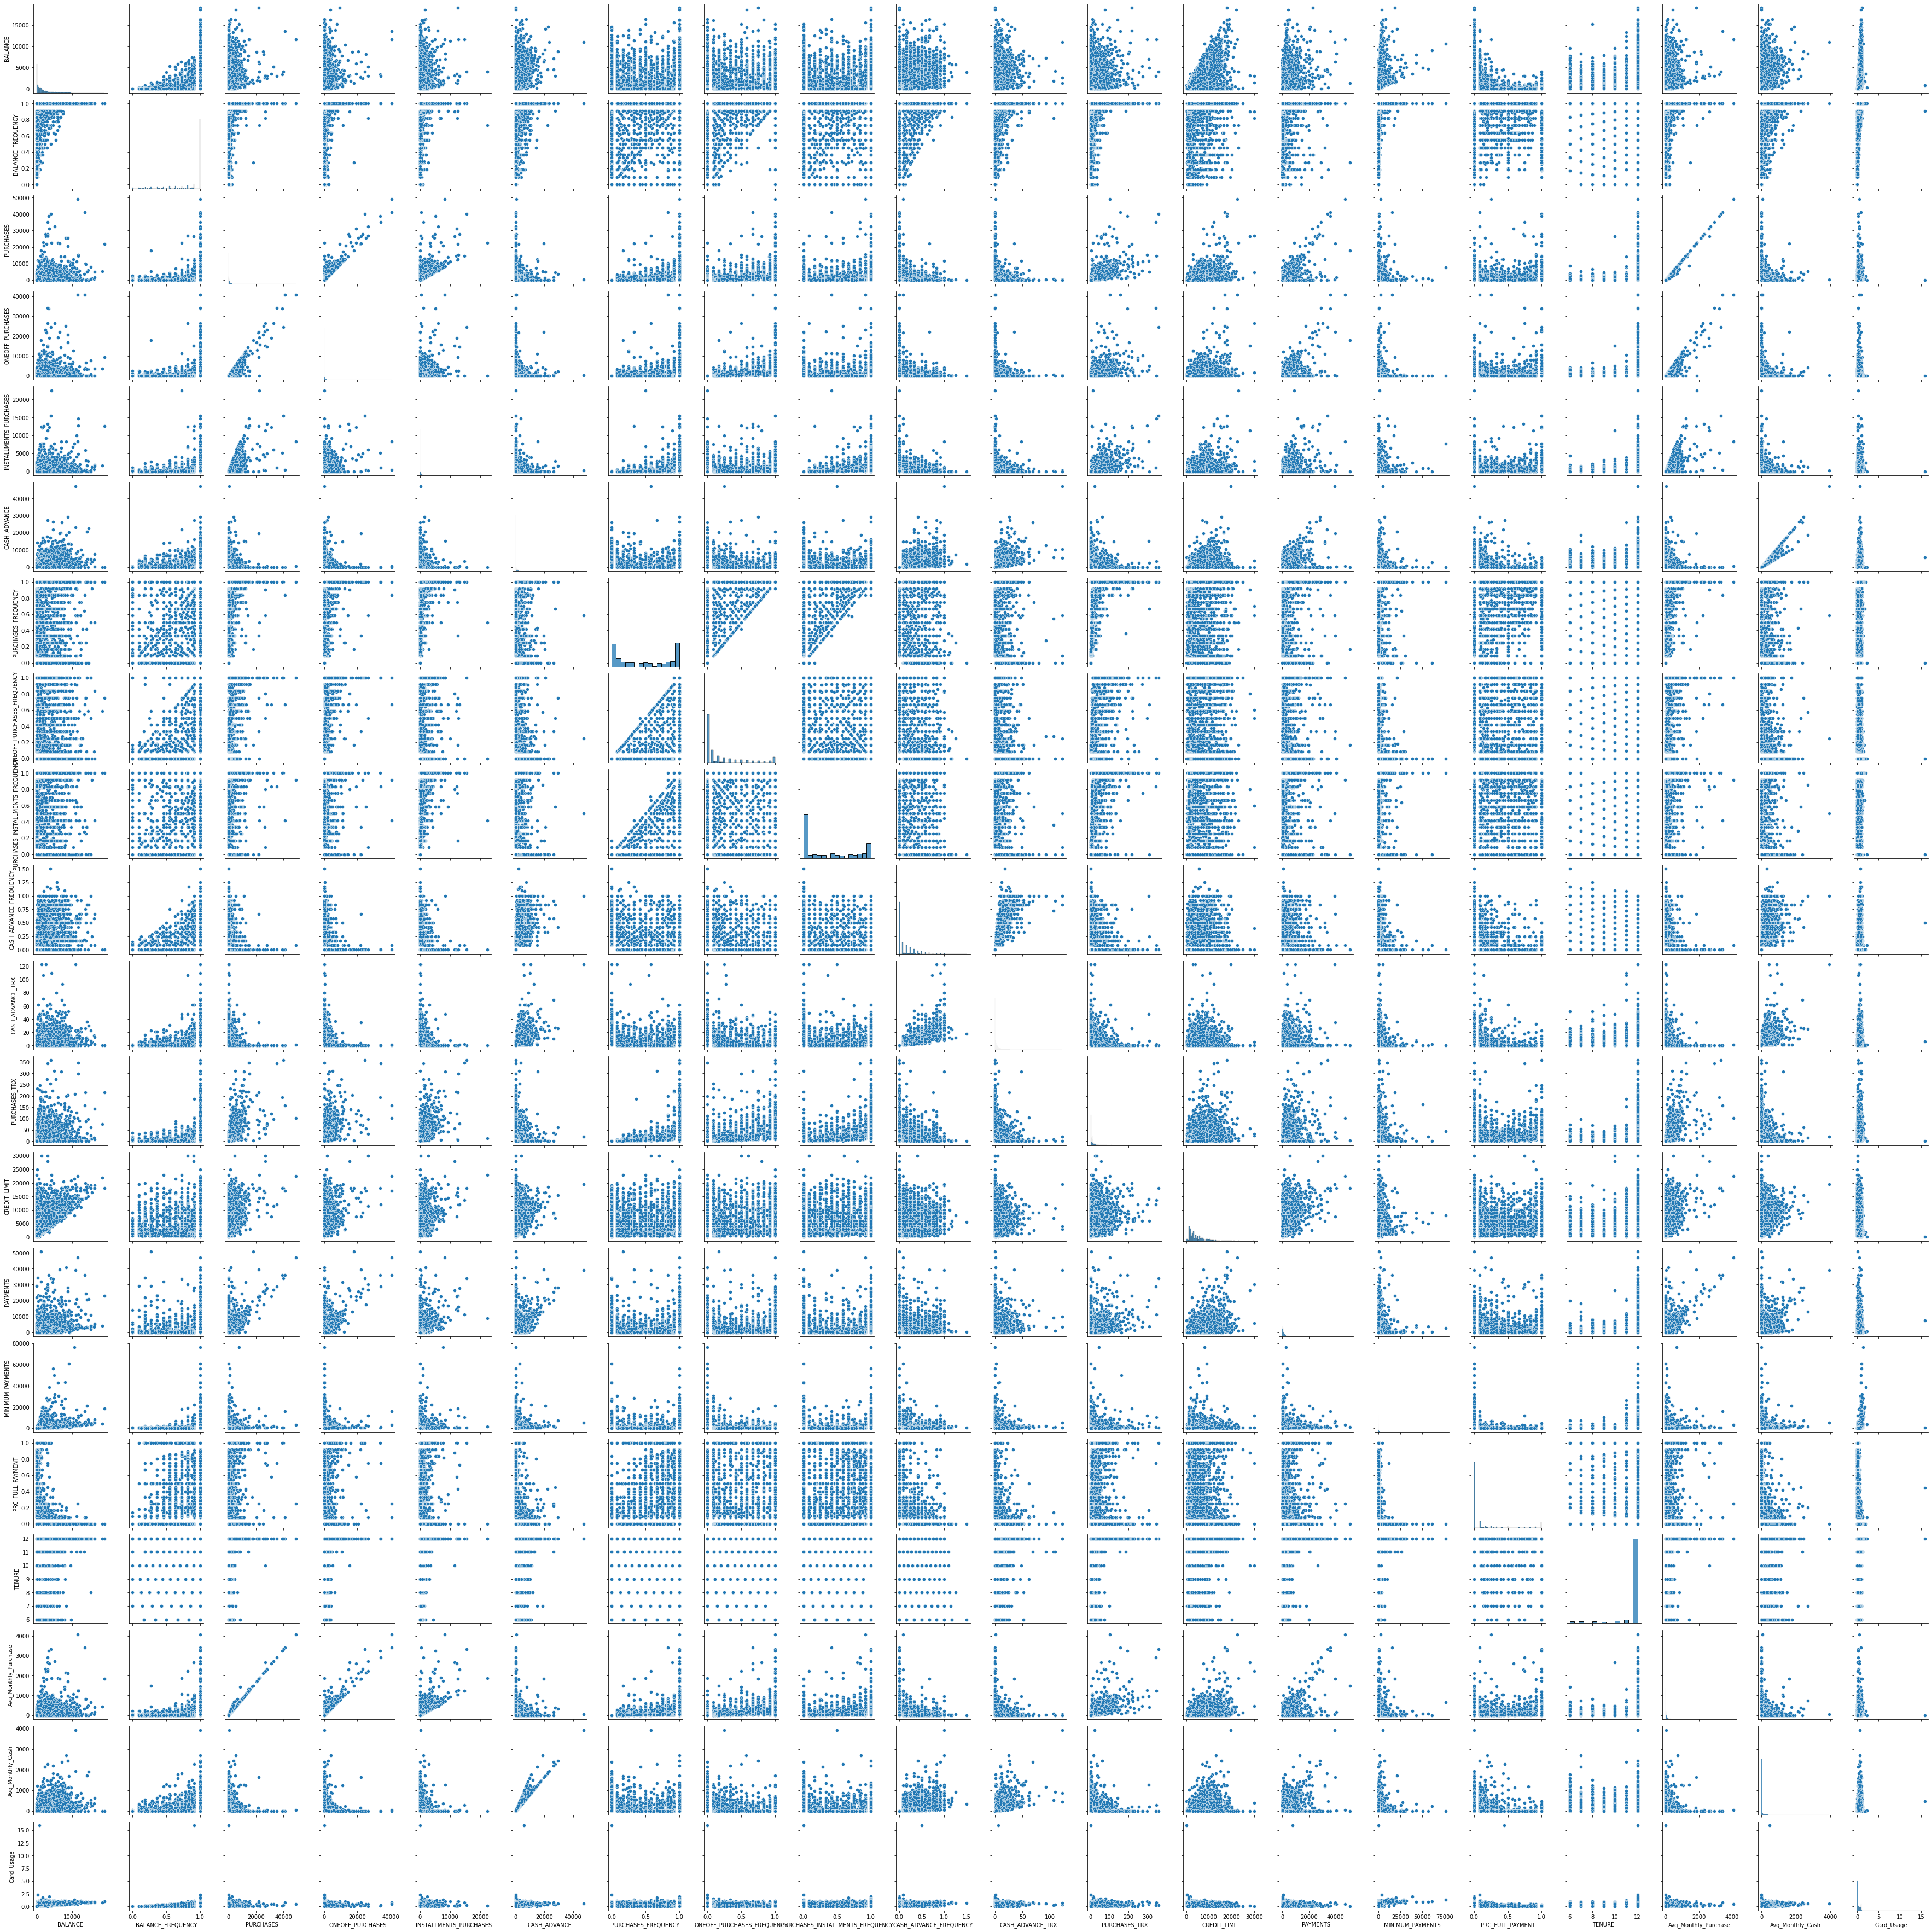

In [19]:
sns.pairplot(df.drop(['Type_of_Purchase'], axis = 1))
plt.show()

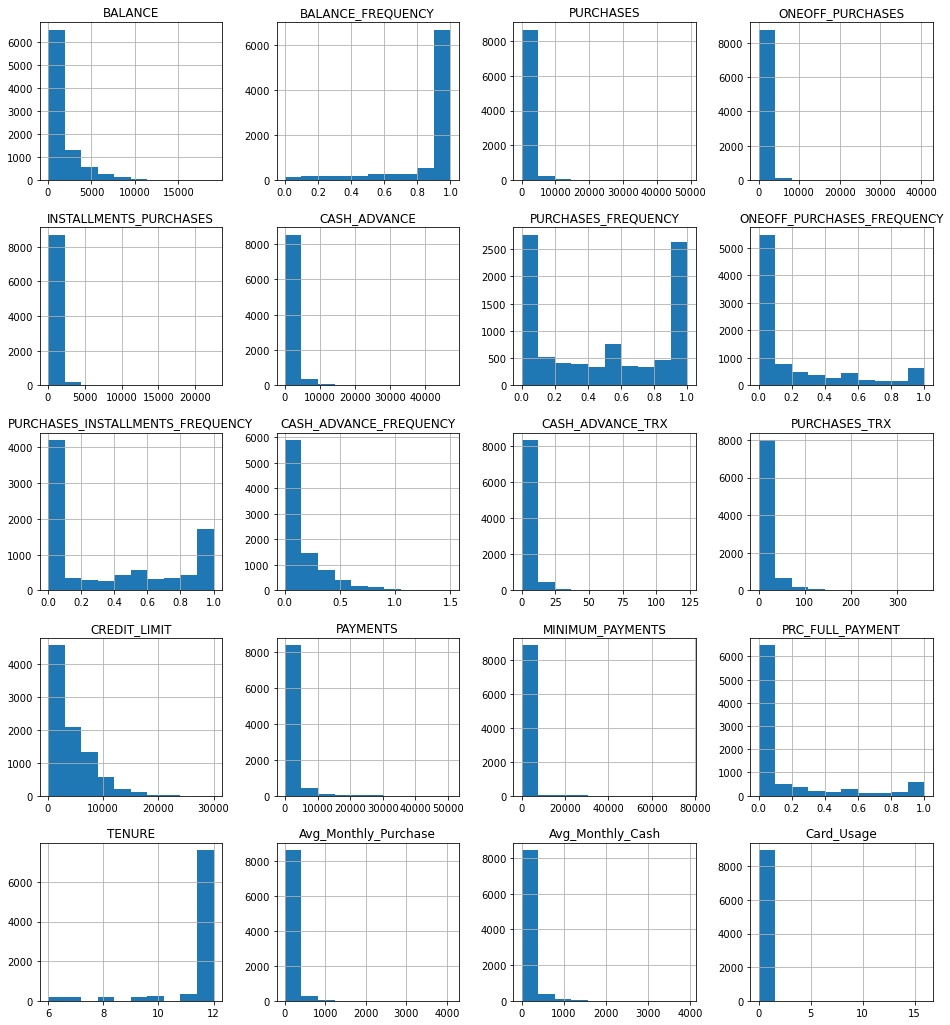

In [20]:
df[numerical_features].hist(figsize = (16,18))
plt.show()

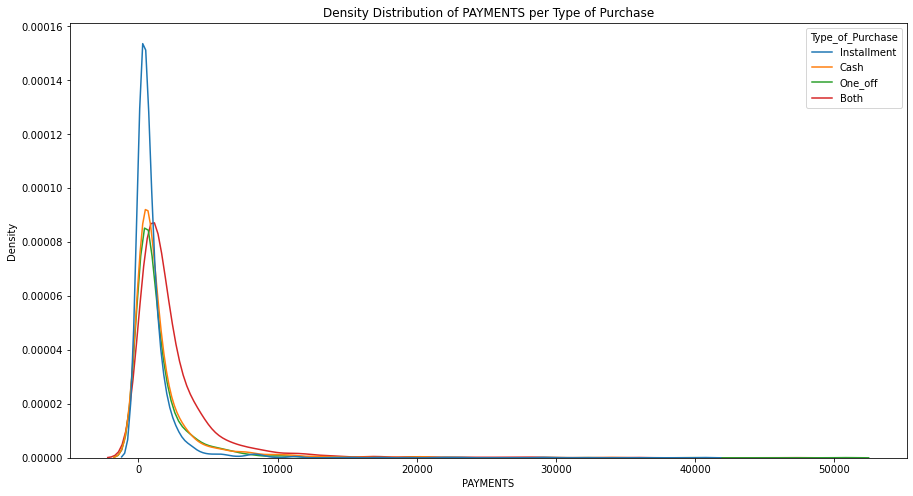

In [21]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df, x='PAYMENTS', hue="Type_of_Purchase").set(title=f"Density Distribution of PAYMENTS per Type of Purchase")
plt.show()

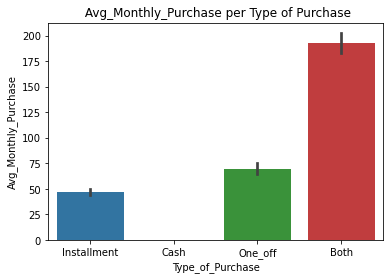

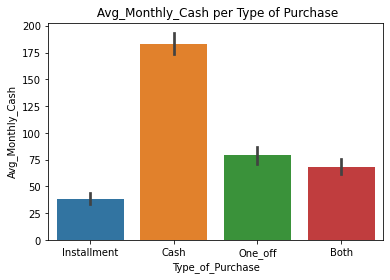

In [38]:
# Visualising spendings on type of purchase
spending_features = ['Avg_Monthly_Purchase','Avg_Monthly_Cash']

for col in spending_features:
    sns.barplot(data = df, x = 'Type_of_Purchase', y = col).set(title=f" {col} per Type of Purchase")
    plt.show()

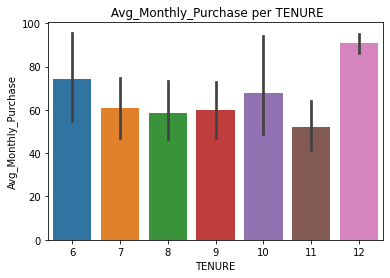

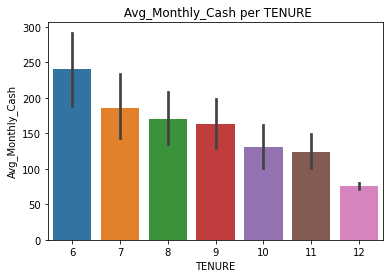

In [23]:
# Visualising spendings on tenure duration
for col in spending_features:
    sns.barplot(data = df, x = 'TENURE', y = col).set(title=f" {col} per TENURE")
    plt.show()

In [28]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Type_of_Purchase', 'Avg_Monthly_Purchase',
       'Avg_Monthly_Cash', 'Card_Usage'],
      dtype='object')

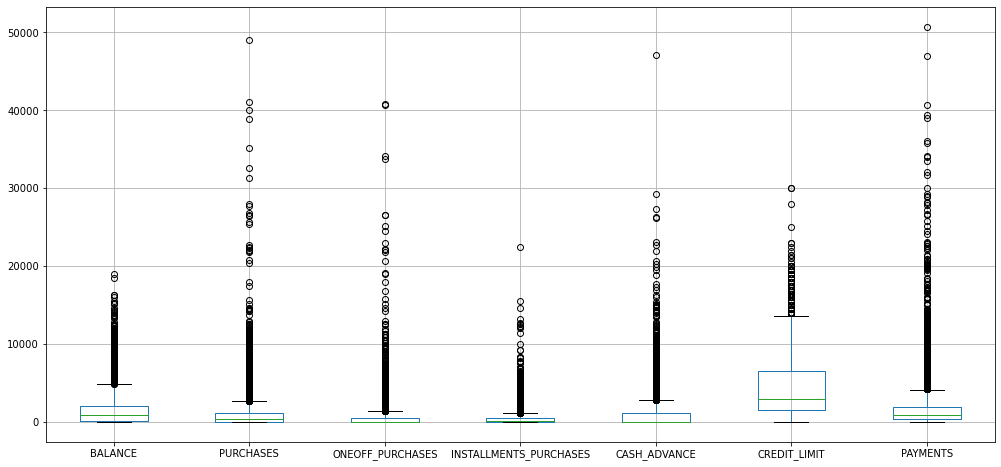

In [32]:
plt.figure(figsize=(17,8))
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].boxplot()
plt.show()

## Feature Scaling

In [108]:
scaler = StandardScaler()
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Avg_Monthly_Purchase', 'Avg_Monthly_Cash', 
        'Card_Usage']]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.732054          -0.249881  -0.424934         -0.356957   
1  0.786858           0.134049  -0.469584         -0.356957   
2  0.447041           0.517980  -0.107716          0.108843   
3  0.049015          -1.017743   0.231995          0.546123   
4 -0.358849           0.517980  -0.462095         -0.347317   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349114     -0.466805            -0.806649   
1               -0.454607      2.605438            -1.221928   
2               -0.454607     -0.466805             1.269742   
3               -0.454607     -0.368678            -1.014290   
4               -0.454607     -0.466805            -1.014290   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678716                         -0.707409   
1                   -0.678716                         -0.917090   
2                    2.673295                         -0.917090   
3                   -0.399383                         -0.917090   
4                   -0.399383                         -0.917090   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675294         -0.476083      -0.511381     -0.960380   
1                0.573949          0.110032      -0.591841      0.688601   
2               -0.675294         -0.476083      -0.109082      0.826016   
3               -0.258882         -0.329554      -0.551611      0.826016   
4               -0.675294         -0.476083      -0.551611     -0.905414   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0 -0.529026         -0.302425         -0.525588  0.360541   
1  0.818546          0.097455          0.234159  0.360541   
2 -0.383857         -0.093329         -0.525588  0.360541   
3 -0.598733         -0.228336         -0.525588  0.360541   
4 -0.364421         -0.257294         -0.525588  0.360541   

   Avg_Monthly_Purchase  Avg_Monthly_Cash  Card_Usage  
0             -0.433418         -0.460737   -0.893059  
1             -0.477461          2.319245    0.175953  
2             -0.120516         -0.460737   -0.144316  
3              0.214573         -0.371944   -0.427774  
4             -0.470074         -0.460737    0.750582

In [109]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Type_of_Purchase', 'Avg_Monthly_Purchase',
       'Avg_Monthly_Cash', 'Card_Usage'],
      dtype='object')

In [110]:
enc =  OrdinalEncoder(categories = 'auto')
cat_df = df[['Type_of_Purchase']]
cat_df[['Type_of_Purchase']] = enc.fit_transform(cat_df)
#Installment = 2.0, Cash = 1.0, One_off = 3.0, Both = 0.0          

In [111]:
X_scaled['Type_of_Purchase'] = cat_df['Type_of_Purchase']